# Water Circulation System 설비 예지 보전

### 목차(Context)

1. 문제 상황 및 데이터 살펴보기
2. 문제해결 프로세스 정의
3. 데이터 전처리 및 EDA
4. 시계열 센서 데이터 분석
5. 이상탐지 모델링

# 1. 문제상황 및 데이터 살펴보기 (시나리오)

A사는 Water Circulation System을 운영하는 유지보수 업체이다. 사업이 확장됨에 따라 많은 고객을 대상으로 Water Circulation System을 설치하고 있다. Water Circulation System은 한 번 고장이 나면 심각한 피해를 발생시키기 때문에 사전에 이상징후를 발견하고 조치를 통해 고장을 사전에 방지하는 활동이 매우 중요하다. A사는 사업이 확장됨에 따라 관리해야할 업체들이 증가하고 있고, 고장이 발생한다면 사업에 큰 지장을 초래하기 때문에 이상진단 모델을 통해서 사전 유지보수 활동을 전개하고자 한다.

## 데이터 살펴보기

- 시계열 센서데이터
- 데이터 명세
- 라벨링 (이상장비에 대한 기준이 있다 는 가정하에 진행) == Supervised Learning

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)    # 최대 컬럼 100개 설정
pd.set_option('display.max_rows', 100)       # 최대 로우 100개 설정

# Data Read
df = pd.read_csv('chapter01_df.csv', sep=';')    # ; 으로 구분되어 있는 파일
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


# 2. 문제 해결 프로세스 정의

### 문제정의

- 사업 확장으로 인한 관리 Point 증가에 따른 운영 및 유지보수 Resource 부족
- Water Circulation System 고장으로 인한 리스크 발생

### 기대효과

- 이상진단 시스템을 통한 사전 유지보수를 통해 고장 발생으로 인한 리스크 감소
- 이상진단 솔루션 제공을 통한 추가 고객 유치

### 해결방안

### - 모델링을 통한 이상진단 시스템 구축 및 운영
- 데이터 전처리 및 EDA
    - (1) Data 전처리
    - (2) Data EDA
- 시계열 센서 데이터 분석
    - (1) 시각화
    - (2) 분포도
    - (3) 상관관계 분석
- 이상탐지 모델링
    - (1) Model 선택
    - (2) 모델링을 위한 데이터 준비
    - (3) 학습 및 평가
    - (4) Scoring 기반 Threshold 조정

[주요 코드 미리 살펴보기]

- .value_counts(normalize=True), plt.plot(df_anomaly.index, df_anomaly['', 'o', color='red', markersize=5);
- enumerate(df.columns[1:8]), sns.distplot(), .corr(), sns.heatmap(mask=np.triu(df_num.corr()))
- train_test_split(stratify=Y), np.where(), classification_report(), clf.decision_function()

### 성과측정 (KPI)

- 이상진단 시스템 활용 전/후 고장 발생률 비교 (사전유지보수 작업으로 인한 고장감소)
- 이상진단 솔루션 운영 전/후 신규 고객 증가 및 기존 고객 만족도 조사

### 현업 적용

- 이상진단 모델 생성
- 실시간 데이터 수집 체계 구축
- 실시간 이상 진단 모델 실행 및 결과값 출력
- 결과값 기반 모니터링 시스템(이상진단 대시보드) 운영

# 3. 데이터 전처리 및 EDA

### Data 전처리

- 수집된 정보들을 확인

1. Data shape(형태) 확인
2. Data Type 확인
3. Null값 확인  -> Null값에 대한 사전대책 마련
4. Outlier 확인 (정상범주를 벗어난 데이터)


In [5]:
# Data Shape 확인 (행과 열의 갯수 확인)
print('df : ', df.shape)

df :  (1063, 11)


In [7]:
# Data Type 확인
df.info()

# object : 문자열
# float : 실수형
# int : 정수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [8]:
# Null 값 유무 확인
print(df.isnull().sum())

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64


In [13]:
# Outlier 확인 (정상범주를 벗어난 데이터 확인)
df.describe()    # 숫자형 데이터에 대한 지표

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.027663,0.040037,1.195240,0.048541,67.895174,24.265096,229.924824,31.472275,0.313264,0.003763
std,0.000333,0.001086,7.113407,0.270689,0.695198,0.021573,13.259556,1.314535,0.464039,0.061256
min,0.026455,0.036972,0.394058,-0.929070,66.201900,24.217000,0.580776,28.040000,0.000000,0.000000
25%,0.027434,0.039276,0.753505,0.054711,67.412450,24.252950,223.570000,31.039050,0.000000,0.000000
50%,0.027674,0.040098,1.002720,0.054711,67.955000,24.267200,230.634000,32.000000,0.000000,0.000000
75%,0.027892,0.040828,1.194580,0.054711,68.515500,24.277450,236.960000,32.038900,1.000000,0.000000
max,0.028554,0.043122,232.734000,1.038490,69.098200,24.332300,254.125000,33.000000,1.000000,1.000000


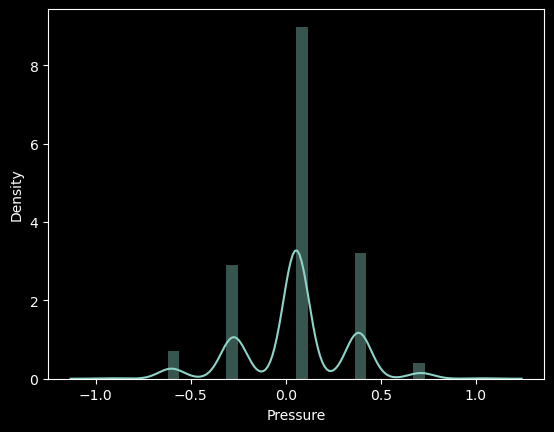

In [17]:
# 시각화를 통한 Outlier 확인 (음수값), pressure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Pressure']);
# 확인 결과 음수값이 Outlier가 아니라고 가정하고 진행

### Data EDA (탐색적 데이터 분석)
    - 데이터 특성 파악을 위한 초기 탐색 (데이터에 대한 이해도 상승이 목적)

In [18]:
# Anomaly 및 Change Point 확인
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


In [19]:
# Anomaly 및 Change Point 확인 (1) - 'anomaly'
# Target ratio (%) 확인
pd.DataFrame({"count":df['anomaly'].value_counts(), 
              "ratio(%)":df['anomaly'].value_counts(normalize=True)*100})

,count,ratio(%)
0.0,730,68.673565
1.0,333,31.326435


In [21]:
# Anomaly 및 Change Point 확인 (1) - 'changepoint
# Target ratio (%) 확인
pd.DataFrame({"count":df['changepoint'].value_counts(), 
              "ratio(%)":df['changepoint'].value_counts(normalize=True)*100})

,count,ratio(%)
0.0,1059,99.623706
1.0,4,0.376294


In [22]:
# 데이터 분리
df_anomaly = df[df['anomaly'] == 1]    # 이상치
df_change = df[df['changepoint'] == 1]
df_normal = df[df['changepoint'] == 0]

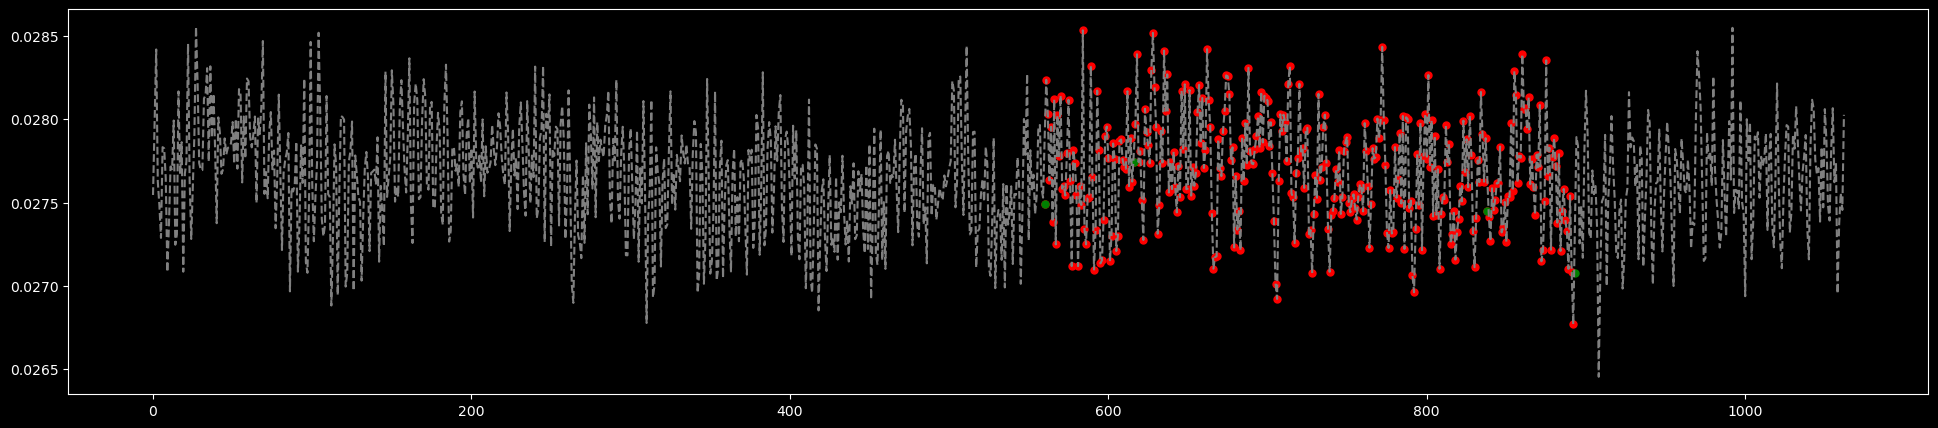

In [23]:
# 진동분석기1 트랜드 분석
plt.figure(figsize=(24,5))
# x축, y축
plt.plot(df_anomaly.index, df_anomaly['Accelerometer1RMS'], 'o', color='red', markersize=5);
plt.plot(df_change.index, df_change['Accelerometer1RMS'], 'o', color='green', markersize=5);
plt.plot(df_normal.index, df_normal['Accelerometer1RMS'], linestyle='--', color='grey');

# 4. 시계열 센서 데이터 분석

- 시계열 센서 데이터 시각화 및 이상 데이터 탐색
- Contextual Anomaly Detection vs Point Anomaly Detection

### 센서 별 시각화 (Time-series)
- 시계열 데이터를 분석할 때는 반드시 시각화부터 먼저 진행을 해야함

In [25]:
df.columns[1:9], len(df.columns[1:9])

(Index(['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
        'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS'],
       dtype='object'),
 8)

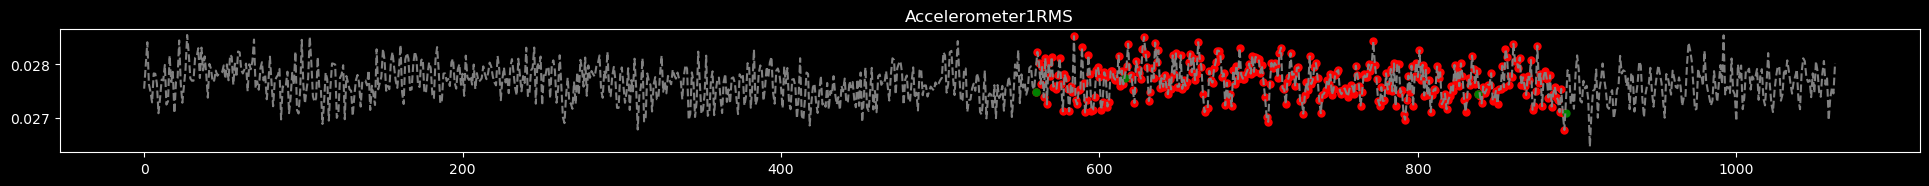

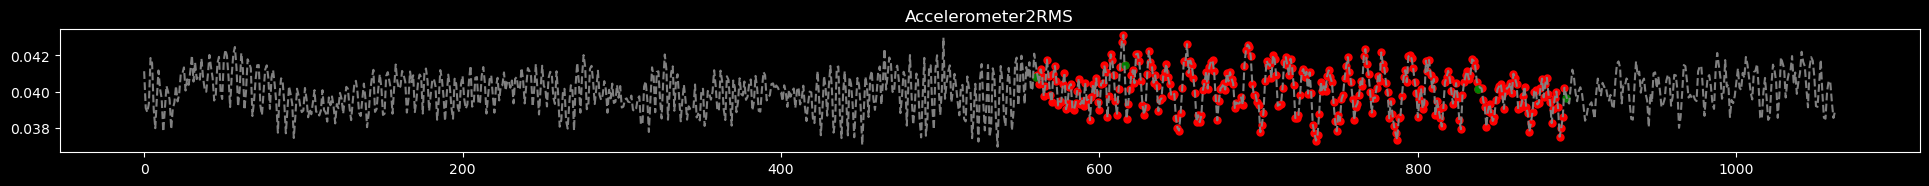

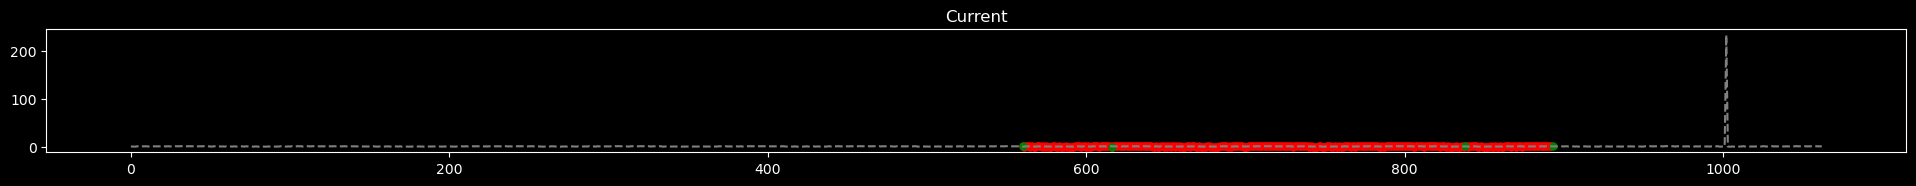

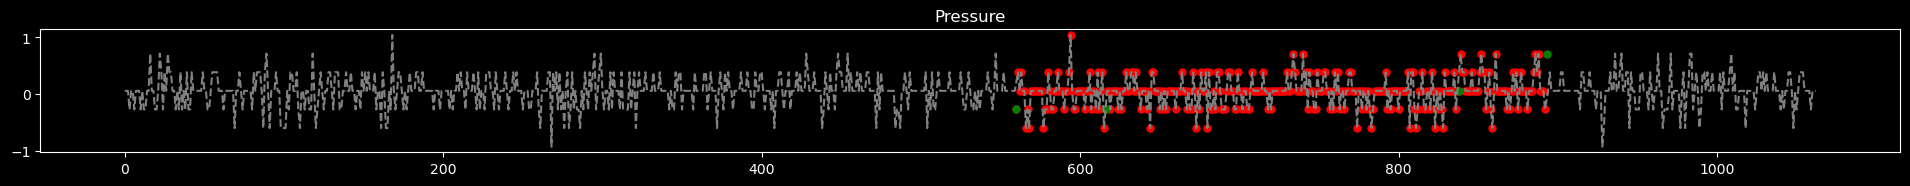

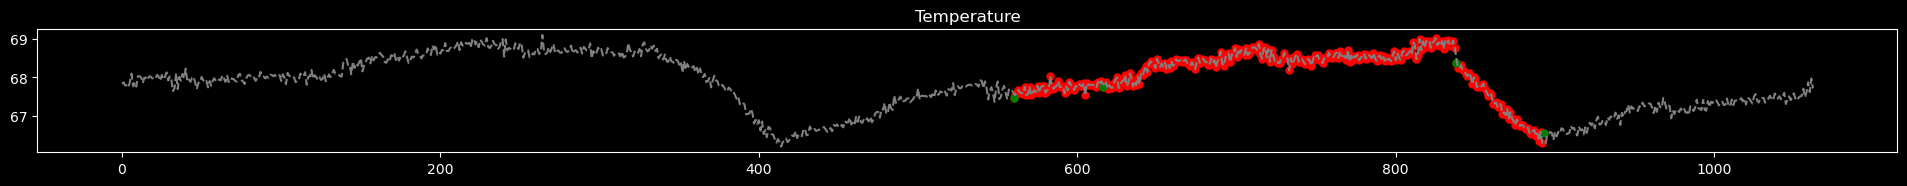

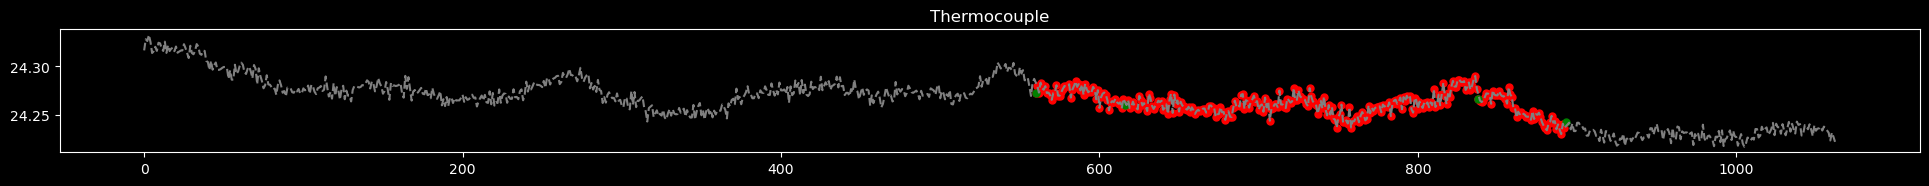

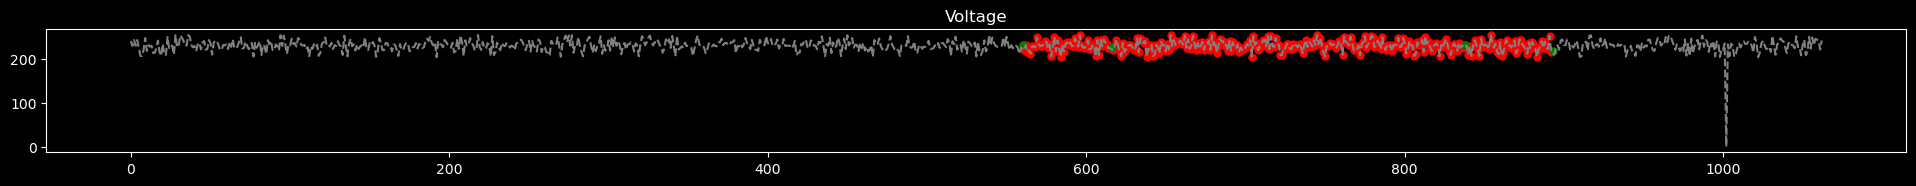

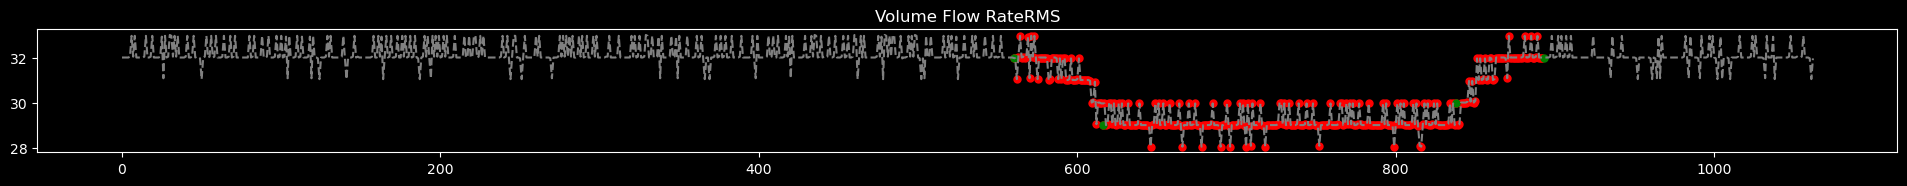

In [31]:
# for문을 활용한 시계열 센서 데이터 시각화
# 단일 변수(진동가속기1)로는 특별히 이상을 탐지하기 어려워 보임 (상관관계 점검)
# 모든 시계열 센서 데이터 시각화 진행

for v, i in enumerate(df.columns[1:9]):
    plt.figure(figsize=(24,15))
    plt.subplot(8, 1, v+1)
    plt.plot(df_anomaly.index, df_anomaly[i], 'o', color='red', markersize=5);
    plt.plot(df_change.index, df_change[i], 'o', color='green', markersize=5);
    plt.plot(df_normal.index, df_normal[i], linestyle='--', color='grey');
    plt.title(i)

### 센서 별 분포

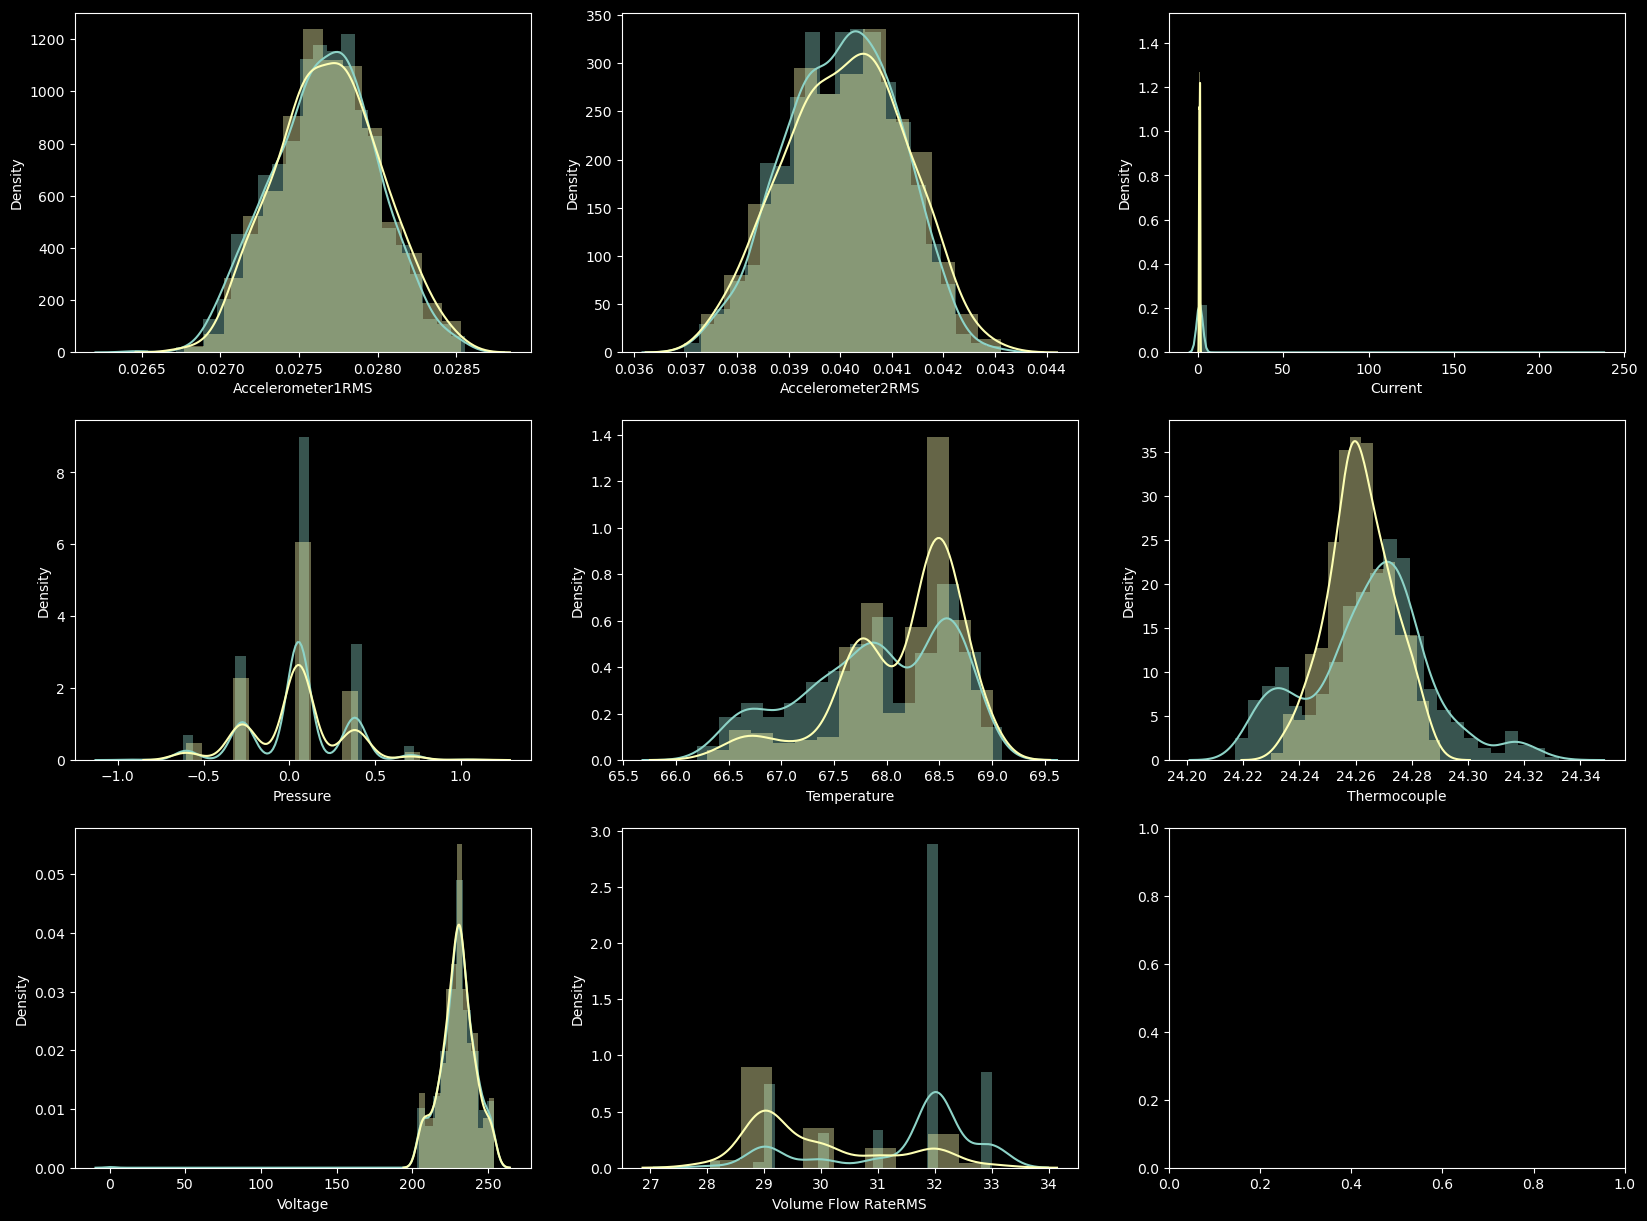

In [28]:
# for문을 활용한 시계열 센서 데이터 분포 시각화
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20, row_n*5))

for i, col in enumerate(df.columns[1:9]):
    sns.distplot(df_normal[col], ax=ax[int(i/col_n), int(i%col_n)])
    sns.distplot(df_anomaly[col], ax=ax[int(i/col_n), int(i%col_n)])

### 상관관계 분석 (Correlation)

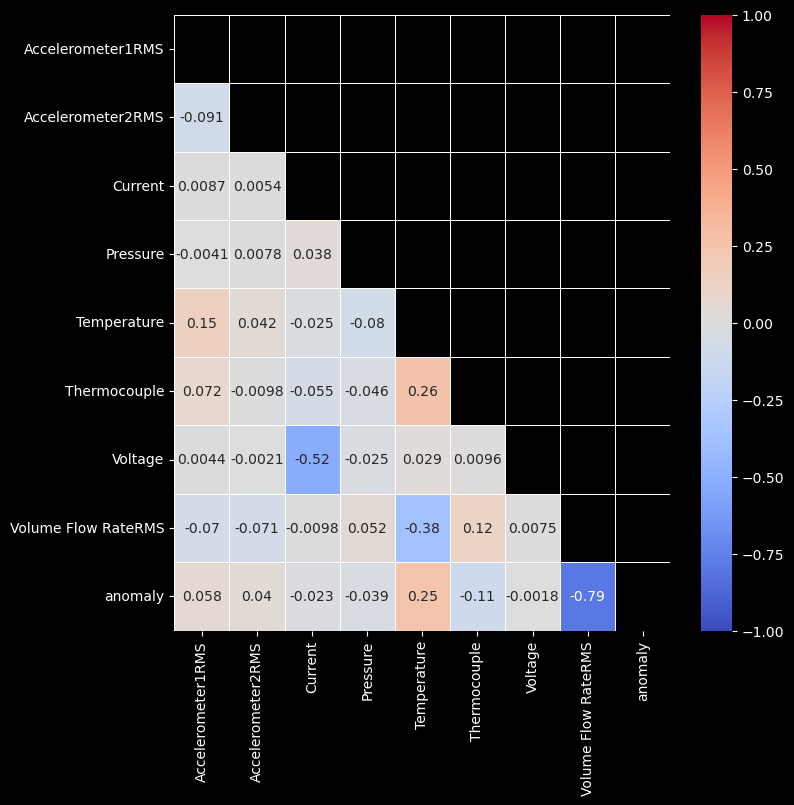

In [33]:
# 분석에 필요한 column만 선택하기
df_corr = df.iloc[:, 1:-1]

# corr() 활용 : 상관관계 확인
fig = plt.figure(figsize=(8,8))
df_num = df_corr.corr()
sns.heatmap(df_num, vmin = -1, vmax = +1, annot = True, cmap='coolwarm', linewidths=.5, mask=np.triu(df_num.corr()));

# 5. 이상탐지 모델링

### Model Selection

- Isolation Forest

다별량에서 효과가 좋은 알고리즘

-장단점

[good] 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적음

[good] Anomaly Detection 성능 우수 (Robust)

[good] Train data에 이상치가 포함되지 않아도 잘 동작함

[bad] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음 (대안책 : Extended Isolation Forest)

### 모델링을 위한 데이터 준비

1. 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눈다
2. 학습과 예측을 위한 Train / Test 셋으로 분할

In [35]:
# 트레인 - 테스트 셋으로 분리
from sklearn.model_selection import train_test_split

# X 데이터와 Y 데이터를 나눈다
X = df.drop(['datetime', 'anomaly', 'changepoint'], axis=1)    # x로 필요없는 데이터는 버린다
Y = df['anomaly']    # Y 데이터를 정의한다

# 학습데이터와 평가데이터 x,y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=123)

print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')       # 정답은 차원이 없음


x_train shape : (744, 8)
x_test shape : (319, 8)
y_train shape : (744,)
y_test shape : (319,)


In [36]:
# 분할이 잘 되었는지 확인
# Train data Target ratio 확인
pd.Series(y_train).value_counts(normalize=True)

0.0    0.686828
1.0    0.313172
Name: anomaly, dtype: float64

In [37]:
# Test data Target ratio 확인
pd.Series(y_test).value_counts(normalize=True)

0.0    0.68652
1.0    0.31348
Name: anomaly, dtype: float64

### 모델 학습 및 평가

In [38]:
from sklearn.ensemble import IsolationForest
# 모델 학습 및 예측
# n_estimators : 나무의 갯수 (default 100)
# max_samples : 샘플링 데이터 갯수 (정수, 실수(0~1), 전체 데이터 갯수 or 256 중 작은 수)
# contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# max_features : 학습 시 사용할 Feature (default 1, 모두 사용)

# random_state 는 여러개로 바꾸면서 가장 나은 값을 적용한다.
clf = IsolationForest(max_samples=200, contamination = 0.30, random_state=42)
clf.fit(x_train)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)    # 과적합을 피하기 위해 테스트와 훈련 셋의 차이를 줄여야한다 (하이퍼 파라미터 조정)

In [39]:
# 평가를 위해 다시 라벨링
y_pred_train = np.where(y_pred_train == -1, 1, 0)    # -1이면 1로, 아니면 0으로 값을 부여
y_pred_test = np.where(y_pred_test == -1, 1, 0)

In [40]:
y_pred_train[0:5], y_pred_test[0:5]

(array([0, 0, 0, 1, 0]), array([1, 0, 0, 0, 0]))

In [42]:
# 성능평가 (recall : 실제 이상)
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72       511
         1.0       0.37      0.35      0.36       233

    accuracy                           0.61       744
   macro avg       0.54      0.54      0.54       744
weighted avg       0.60      0.61      0.61       744

--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.69      0.68      0.69       219
         1.0       0.32      0.33      0.33       100

    accuracy                           0.57       319
   macro avg       0.51      0.51      0.51       319
weighted avg       0.58      0.57      0.57       319



### Scoring 기반 Threshold 조정

In [43]:
# prediction 과 Score 비교
# 음수 값일 수록 Outlier 일 확률이 큼
y_pred_train[0:5], clf.decision_function(x_train)[0:5]

(array([0, 0, 0, 1, 0]),
 array([ 0.0256254 ,  0.03642322,  0.01464554, -0.06354214,  0.03496935]))

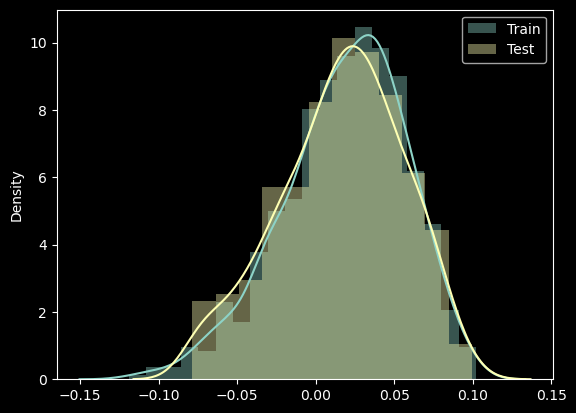

In [44]:
# 분포 시각화를 통해 Threshold 조정 (train set , test set)
sns.distplot(clf.decision_function(x_train), label='Train');
sns.distplot(clf.decision_function(x_test), label="Test");
plt.legend();

In [47]:
# Score 변수 할당
y_pred_train_score = clf.decision_function(x_train)
y_pred_test_score = clf.decision_function(x_test)

# Threshold 조정
y_pred_train = np.where(y_pred_train_score < -0.01, 1, 0)
y_pred_test = np.where(y_pred_test_score < -0.01, 1, 0)

In [48]:
# 성능평가 re
print(classification_report(y_train, y_pred_train))
print('--------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       511
         1.0       0.37      0.26      0.30       233

    accuracy                           0.63       744
   macro avg       0.53      0.53      0.52       744
weighted avg       0.60      0.63      0.61       744

--------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73       219
         1.0       0.36      0.29      0.32       100

    accuracy                           0.61       319
   macro avg       0.53      0.53      0.53       319
weighted avg       0.59      0.61      0.60       319



In [49]:
pd.Series(y_pred_train).value_counts()

0    580
1    164
dtype: int64

In [50]:
pd.Series(y_pred_test).value_counts()

0    238
1     81
dtype: int64